In [1]:
#Practical No 4: KMeans

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv("D:/LP3/ML/P4_sales_data_sample.csv", encoding="latin")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [12]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [13]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [16]:
df=df[['ORDERLINENUMBER', 'SALES']]

In [17]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df.values)

In [23]:
wcss=[]
for i in range(1,11):
    model =KMeans(n_clusters=i,init='k-means++')
    model.fit_predict(scaled_values)
    wcss.append(model.inertia_)

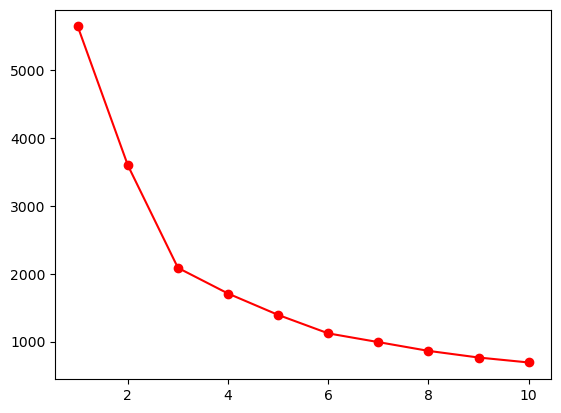

In [24]:
plt.plot(range(1,11),wcss,'ro-')
plt.show()

In [27]:
model = KMeans(n_clusters=7, init='k-means++')
clusters = model.fit_predict(scaled_values)
clusters

array([5, 5, 1, ..., 3, 5, 2])

In [30]:
df['cluster']=clusters

In [31]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,cluster
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,5
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,5
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,1
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,1
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small,4
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium,1
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium,3
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small,5


In [32]:
model.inertia_

AttributeError: 'KMeans' object has no attribute 'inertia'